In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/train_viz.csv')


<Axes: xlabel='duration (m)', ylabel='price (£)'>

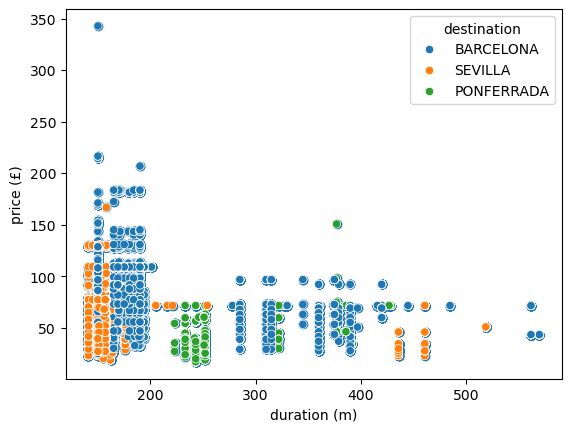

In [3]:
plt.scatter(x=df['duration'],
            y=df['price'])
plt.xlabel('duration (m)')
plt.ylabel('price (£)')

sns.scatterplot(data=df,
                x = 'duration',
                y = 'price', 
                hue = 'destination')


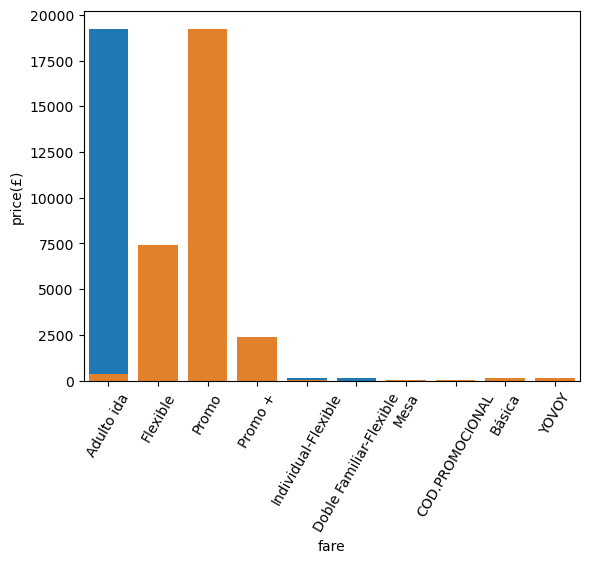

In [10]:
plt.bar(x=df['fare'].unique(),
        height = df['fare'].value_counts())
plt.ylabel('price(£)')
plt.xticks(rotation=60);

sns.countplot(data=df,
              x='fare')
plt.xticks(rotation=60);

<Axes: xlabel='destination', ylabel='price'>

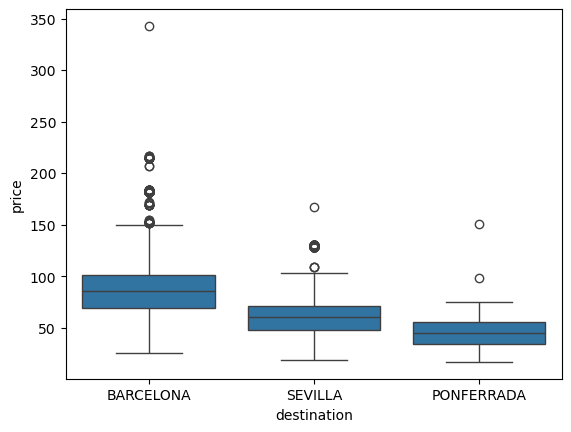

In [11]:
sns.boxplot(data=df,
            x='destination',
            y='price')


<Axes: xlabel='price', ylabel='Count'>

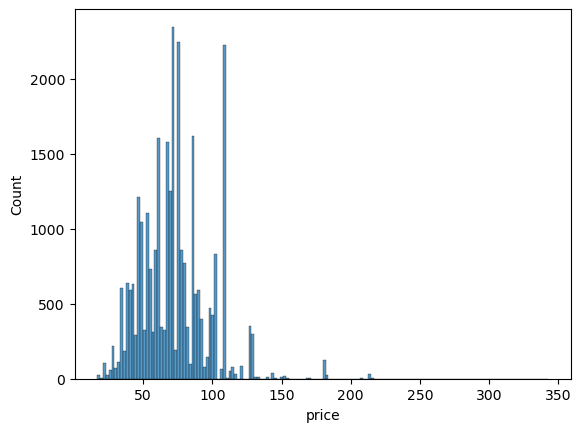

In [12]:
sns.histplot(data=df, 
             x='price')

<Axes: xlabel='destination', ylabel='price'>

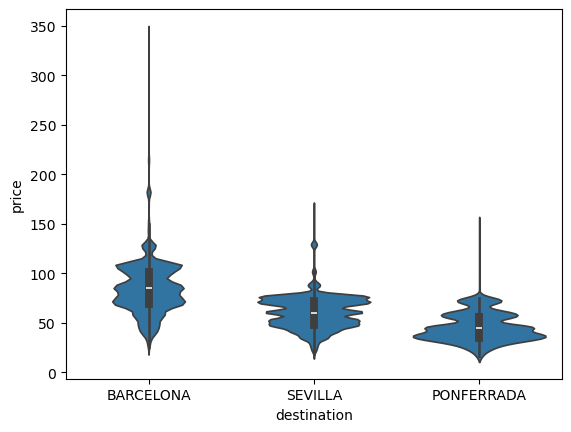

In [13]:
sns.violinplot(data=df,
               x='destination',
               y='price')

<Axes: >

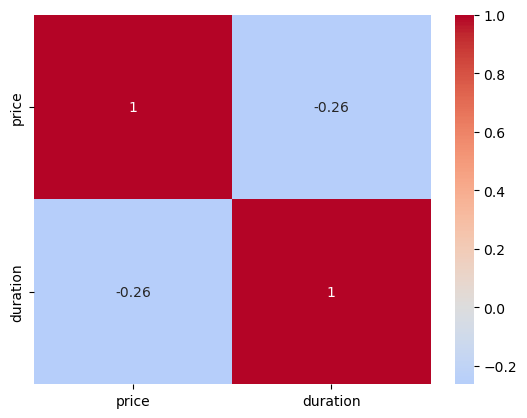

In [15]:
sns.heatmap(df.corr(numeric_only=True),
            cmap='coolwarm',
            annot=True,
            center=0.0)